In [1]:
import numpy as np
import keras
import matplotlib
import matplotlib.pyplot as plt

On importe le jeu de données MNIST de Keras.

In [2]:
from keras.datasets import mnist
(X_train_0, y_train_0), (X_test_0, y_test_0) = mnist.load_data()

In [3]:
print('Regardons le format de ces donnees\n')
print('X_train_0.shape',X_train_0.shape)
print('y_train_0.shape',y_train_0.shape)
print('X_test_0.shape',X_test_0.shape)
print('y_test_0.shape',y_test_0.shape)

Regardons le format de ces donnees

X_train_0.shape (60000, 28, 28)
y_train_0.shape (60000,)
X_test_0.shape (10000, 28, 28)
y_test_0.shape (10000,)


```
## Regardons le format de ces donnees
##
## X_train_0.shape (60000, 28, 28)
## y_train_0.shape (60000,)
## X_test_0.shape (10000, 28, 28)
## y_test_0.shape (10000,)
```

In [4]:
# On reformate les donnees pour qu'elles soient sous la forme de tableaux a deux dimensions
num_pixels = X_train_0.shape[1] * X_train_0.shape[2]
img_cols = X_train_0.shape[1]
img_rows = X_train_0.shape[2]
X_train  = X_train_0.reshape(X_train_0.shape[0], num_pixels)
X_test   = X_test_0.reshape(X_test_0.shape[0], num_pixels)
y_train  = y_train_0.reshape(y_train_0.shape[0], 1)
y_test   = y_test_0.reshape(y_test_0.shape[0], 1)
X_train  = X_train.astype('float32')
X_test   = X_test.astype('float32')
y_train  = y_train.astype('float32')
y_test   = y_test.astype('float32')
X_train  = X_train / 255
X_test   = X_test / 255

In [5]:
print('Regardons le format de ces donnees transformees\n')
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)

Regardons le format de ces donnees transformees

X_train.shape (60000, 784)
y_train.shape (60000, 1)
X_test.shape (10000, 784)
y_test.shape (10000, 1)


```
## Regardons le format de ces donnees transformees
##
## X_train.shape (60000, 784)
## y_train.shape (60000, 1)
## X_test.shape (10000, 784)
## y_test.shape (10000, 1)
```

# Classification binaire pour le chiffre 5

On veut apprendre à reconnaitre le chiffre 5.

In [6]:
# Dans un premier temps, on reformate les donnees pour que la classe associee aux images d'un 5 soit 1
# et la classe des autres images soit 0

y_new = np.zeros(y_train.shape)
y_new[np.where(y_train==5.0)[0]] = 1
y_train = y_new

y_new = np.zeros(y_test.shape)
y_new[np.where(y_test==5.0)[0]] = 1
y_test = y_new

num_train_samples  = X_train.shape[0] # nombre de donnes d'apprenstissage
num_test_samples  = X_train.shape[0]  # nombre de donnees de test

In [7]:
print('Regardons les donnees reformatees\n')
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)
print('\nNombre d\'exemples',num_train_samples)
print('Nombre de pixels par image',num_pixels)

Regardons les donnees reformatees

X_train.shape (60000, 784)
y_train.shape (60000, 1)
X_test.shape (10000, 784)
y_test.shape (10000, 1)

Nombre d'exemples 60000
Nombre de pixels par image 784


```
## Regardons les donnees reformatees
##
## X_train.shape (60000, 784)
## y_train.shape (60000, 1)
## X_test.shape (10000, 784)
## y_test.shape (10000, 1)
##
## Nombre d'exemples 60000
## Nombre de pixels par image 784
```

In [8]:
# On ordonne aleatoirement les donnees d'apprentissage
np.random.seed(138)
shuffle_index = np.random.permutation(num_train_samples)
X_train, y_train = X_train[shuffle_index,:], y_train[shuffle_index,:]

In [9]:
# Afficher l'image i du jeu de donnees X et son score dans y
def show_image(i,X,Y):
    print('y[{}]={}'.format(i, Y[i,:]))
    plt.imshow(X[i,:].reshape(img_rows,img_cols), cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.show()

Regardons quelques images utilisees pour l'apprentissage
y[32]=[0.]


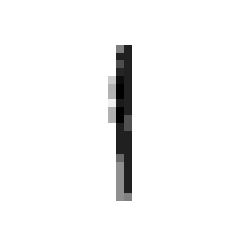

y[45]=[0.]


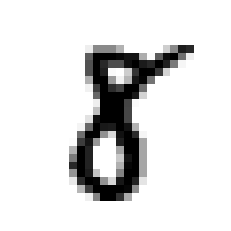

In [36]:
print('Regardons quelques images utilisees pour l\'apprentissage')
show_image(np.random.randint(0,100),X_train,y_train)
show_image(np.random.randint(0,100),X_train,y_train)

```
## Regardons quelques images utilisees pour l'apprentissage
## y[34]=[0.]
## y[30]=[0.]
```
![is5_random1](is5_random1.png)
![is5_random2](is5_random2.png)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# Fonctions permettant de visualiser l'historique d'apprentissage
def plot_train_history_accuracy(history):
    acc = list(history.history.keys())[1]
    plt.plot(history.history[acc])
    plt.title('model accuracy')
    plt.ylabel(acc)
    plt.xlabel('epoch')
    plt.show()
    
def plot_train_history_loss(history):
    loss = list(history.history.keys())[0]
    plt.plot(history.history[loss])
    plt.title('model loss')
    plt.ylabel(loss)
    plt.xlabel('epoch')
    plt.show()

## Modèle avec 1 seul neurone

On crée un modèle à un seul neurone, utilisant la fonction de perte `binary_crossentropy`, l'optimiseur `adam` et la métrique `binary_accuracy` (on fait de la classification binaire).

In [13]:
# Creation du modele
# -- Parametres du modele
model_1_functions = {'loss':'binary_crossentropy', 'optimizer':'adam','metrics':['binary_accuracy']}
# -- Architecture du modele
model_1 = Sequential()
model_1.add(Dense(1, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
# -- Compilation
model_1.compile(loss=model_1_functions['loss'],optimizer=model_1_functions['optimizer'],metrics=model_1_functions['metrics'])

In [14]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_1 = {'batch_size': 128, 'epochs': 10}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_1_history = model_1.fit(X_train, y_train, batch_size=learning_parameters_1['batch_size'], epochs=learning_parameters_1['epochs'], verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


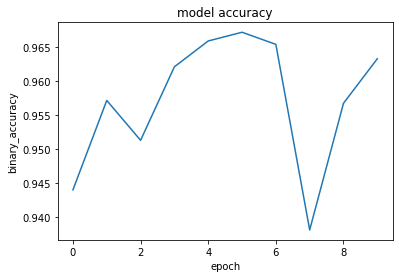

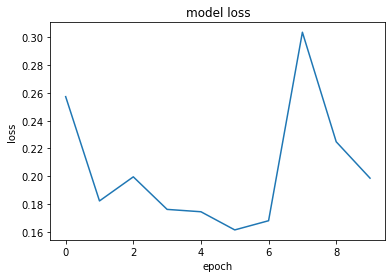

In [15]:
# -- Resume
model_1.summary()
plot_train_history_accuracy(model_1_history)
plot_train_history_loss(model_1_history)

```
## Model: "sequential"
## _________________________________________________________________
## Layer (type)                Output Shape              Param #   
## =================================================================
## dense (Dense)               (None, 1)                 785       
##                                                                 
## =================================================================
## Total params: 785
## Trainable params: 785
## Non-trainable params: 0
## _________________________________________________________________
```
![neurone1_accuracy](neurone1_accuracy.png)
![neurone1_loss](neurone1_loss.png)

In [16]:
# Prediction sur le jeu de test
final_loss_1, final_acc_1 = model_1.evaluate(X_test, y_test, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_1, final_acc_1))
y_test_predictions_1 = model_1.predict(X_test)

Perte finale sur les donnees de test: 0.195469, exactitude finale sur les donnees de test: 0.965700


```
## Perte finale sur les donnees de test: 0.203753, exactitude finale sur les donnees de test: 0.961600
```

y[8]=[0.]


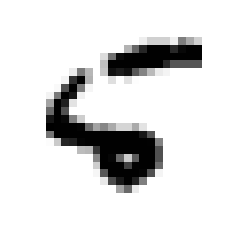

y[15]=[0.36870903]


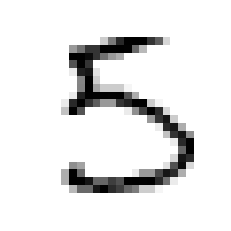

y[23]=[0.9240908]


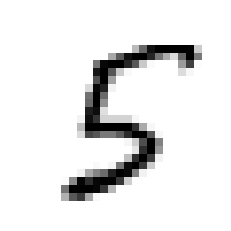

y[45]=[0.8125378]


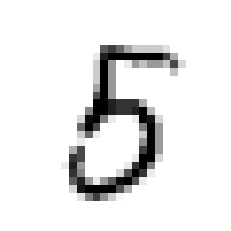

y[52]=[0.25079286]


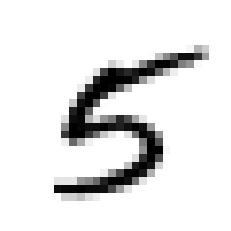

y[53]=[0.45080715]


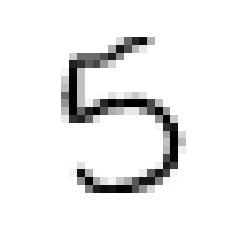

y[59]=[0.18953319]


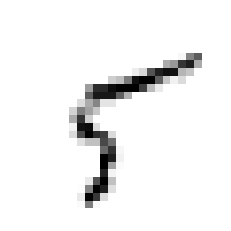

In [17]:
# Quelques exemples choisis au hasard
for i in range(100):
    if y_test[i]==1:
        show_image(i,X_test,y_test_predictions_1)
    if y_test_predictions_1[i]>0.5 and y_test[i]!=1:
        show_image(i,X_test,y_test_predictions_1)

```
## y[8]=[0.]
## y[15]=[0.8508051]
## y[23]=[0.933394]
## y[32]=[0.52359885]
## y[45]=[0.8185054]
## y[52]=[0.47971982]
## y[53]=[0.69859356]
## y[59]=[0.50010645]
## y[84]=[0.50641185]
```
![is5_8](is5_8.png)
![is5_15](is5_15.png)
![is5_23](is5_23.png)
![is5_32](is5_32.png)
![is5_45](is5_45.png)
![is5_52](is5_52.png)
![is5_53](is5_53.png)
![is5_59](is5_59.png)
![is5_84](is5_84.png)


#### Commentaires?

## Modèle avec une couche cachée de 64 neurones

On ajoute une couche cachée de 64 neurones

In [18]:
# Creation du modele
# -- Parametres du modele
model_2_functions = {'loss':'binary_crossentropy', 'optimizer':'adam','metrics':['binary_accuracy']}
# -- Architecture du modele
model_2 = Sequential()
model_2.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# -- Compilation
model_2.compile(loss=model_2_functions['loss'],optimizer=model_2_functions['optimizer'],metrics=model_2_functions['metrics'])

In [19]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_2 = {'batch_size': 128, 'epochs': 10}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_2_history = model_2.fit(X_train, y_train, batch_size=learning_parameters_2['batch_size'], epochs=learning_parameters_2['epochs'], verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 50,305
Trainable params: 50,305
Non-trainable params: 0
_________________________________________________________________


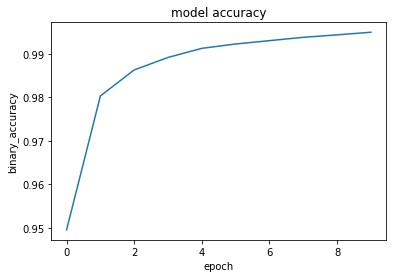

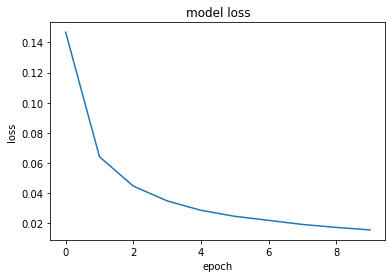

In [20]:
# -- Resume
model_2.summary()
plot_train_history_accuracy(model_2_history)
plot_train_history_loss(model_2_history)

```
## Model: "sequential_1"
## _________________________________________________________________
## Layer (type)                Output Shape              Param #   
## =================================================================
## dense_1 (Dense)             (None, 64)                50240     
##                                                                 
## dense_2 (Dense)             (None, 1)                 65        
##                                                                 
## =================================================================
## Total params: 50,305
## Trainable params: 50,305
## Non-trainable params: 0
## _________________________________________________________________
```
![neurone64_accuracy](neurone64_accuracy.png)
![neurone64_loss](neurone64_loss.png)

In [21]:
# Prediction sur le jeu de test
final_loss_2, final_acc_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_2, final_acc_2))
y_test_predictions_2 = model_2.predict(X_test)

Perte finale sur les donnees de test: 0.019458, exactitude finale sur les donnees de test: 0.992900


```
## Perte finale sur les donnees de test: 0.018527, exactitude finale sur les donnees de test: 0.993100
```

y[8]=[0.08757243]


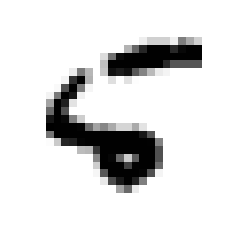

y[15]=[0.9470302]


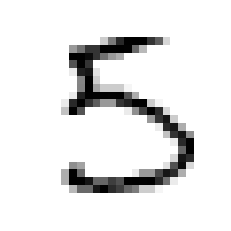

y[23]=[0.99840784]


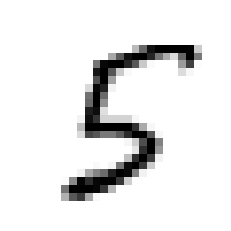

y[45]=[0.94587326]


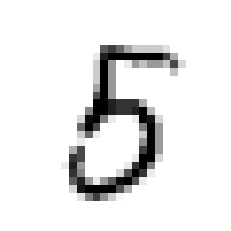

y[52]=[0.9996349]


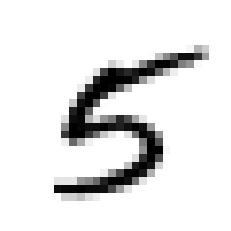

y[53]=[0.98123205]


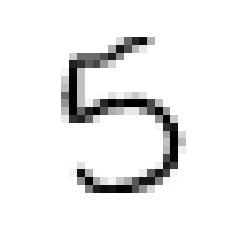

y[59]=[0.98770785]


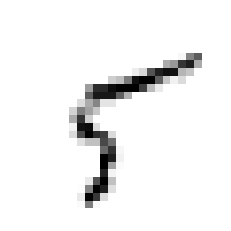

In [22]:
for i in range(100):
    if y_test[i]==1:
        show_image(i,X_test,y_test_predictions_2)
    if y_test_predictions_2[i]>0.5 and y_test[i]!=1:
        show_image(i,X_test,y_test_predictions_2)

```
## y[8]=[0.29128146]
## y[15]=[0.9523465]
## y[23]=[0.99929726]
## y[45]=[0.98081803]
## y[52]=[0.9724734]
## y[53]=[0.9941415]
## y[59]=[0.96948206]
```
![is5_8](is5_8.png)
![is5_15](is5_15.png)
![is5_23](is5_23.png)
![is5_45](is5_45.png)
![is5_52](is5_52.png)
![is5_53](is5_53.png)
![is5_59](is5_59.png)

# Classification pour tous les chiffres

On modifie le reseau pour reconnaitre tous les chiffres et non plus seulement faire de la classification binaire (5 versus not-5).

In [23]:
from keras.utils import np_utils

num_classes = 10
y_train_cat = np_utils.to_categorical(y_train_0,num_classes)
y_test_cat  = np_utils.to_categorical(y_test_0,num_classes)

## Modèle avec 2 couches cachées de 64 neurones

In [24]:
# Creation du modele
# -- Parametres du modele
model_3_functions = {'loss':'categorical_crossentropy', 'optimizer':'adam','metrics':['categorical_accuracy']}
# -- Architecture du modele
model_3 = Sequential()
model_3.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_3.add(Dense(64, input_dim=num_pixels, kernel_initializer='uniform', activation='relu'))
model_3.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
# -- Compilation
model_3.compile(loss=model_3_functions['loss'],optimizer=model_3_functions['optimizer'],metrics=model_3_functions['metrics'])

In [25]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_3 = {'batch_size': 128, 'epochs': 50}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_3_history = model_3.fit(X_train, y_train_cat, batch_size=learning_parameters_3['batch_size'], epochs=learning_parameters_3['epochs'], verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


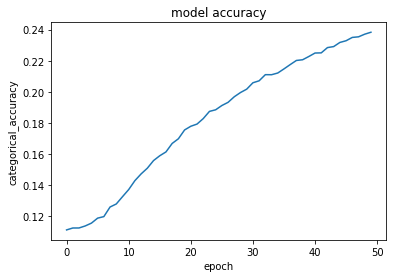

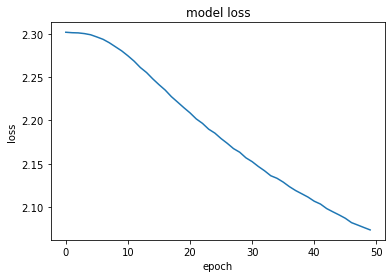

In [26]:
# -- Resume
model_3.summary()
plot_train_history_accuracy(model_3_history)
plot_train_history_loss(model_3_history)

```
## Model: "sequential_2"
## _________________________________________________________________
## Layer (type)                Output Shape              Param #   
## =================================================================
## dense_3 (Dense)             (None, 64)                50240     
##                                                                 
## dense_4 (Dense)             (None, 64)                4160      
##                                                                 
## dense_5 (Dense)             (None, 10)                650       
##                                                                 
## =================================================================
## Total params: 55,050
## Trainable params: 55,050
## Non-trainable params: 0
## _________________________________________________________________
```
![neurone2x64_accuracy](neurone2x64_accuracy.png)
![neurone2x64_loss](neurone2x64_loss.png)

In [27]:
# Prediction sur le jeu de test
final_loss_3, final_acc_3 = model_3.evaluate(X_test, y_test_cat, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_3, final_acc_3))
y_test_predictions_3 = model_3.predict(X_test)

Perte finale sur les donnees de test: 2.600331, exactitude finale sur les donnees de test: 0.091400


```
## Perte finale sur les donnees de test: 2.614959, exactitude finale sur les donnees de test: 0.099300
```

y[0]=[0.06362444 0.12898119 0.08886772 0.1669044  0.10876045 0.07855047
 0.11512301 0.05700442 0.11125764 0.08092623]


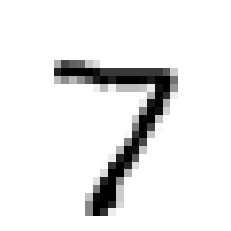

y[1]=[0.0114188  0.07517447 0.00447704 0.58235043 0.0259665  0.03430815
 0.01859783 0.1453074  0.06679936 0.03559996]


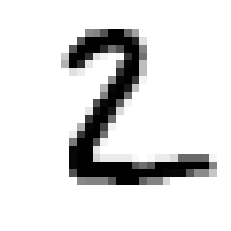

y[2]=[0.1555856  0.08255875 0.13982575 0.07617515 0.0519399  0.0803204
 0.12194913 0.12408794 0.09978387 0.06777357]


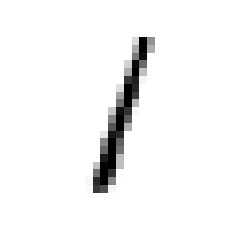

y[3]=[0.10160852 0.11869945 0.11312027 0.1533863  0.08206182 0.06538635
 0.05315828 0.0756555  0.16695336 0.06997018]


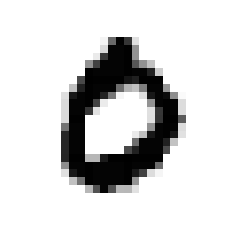

y[4]=[0.08025929 0.11027531 0.05651987 0.10976916 0.06447899 0.07351474
 0.06121493 0.21131617 0.10814354 0.12450799]


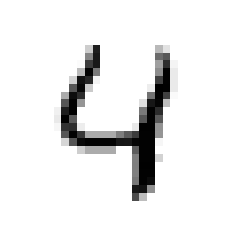

y[5]=[0.18518661 0.0833122  0.09789655 0.07712745 0.08078815 0.08884033
 0.10906165 0.11334357 0.07376643 0.09067708]


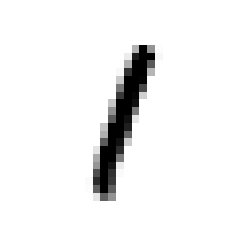

y[6]=[0.09797876 0.09215703 0.1120002  0.09854876 0.1117157  0.09889228
 0.10234805 0.09429149 0.08566977 0.10639801]


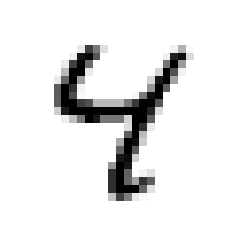

y[7]=[0.22391078 0.0419605  0.04891369 0.05692689 0.06437031 0.12178457
 0.06075493 0.19750863 0.05225842 0.13161118]


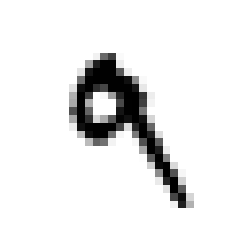

y[8]=[0.00861932 0.22104856 0.29542914 0.2464636  0.00708533 0.03106553
 0.03517904 0.09408496 0.02468042 0.03634409]


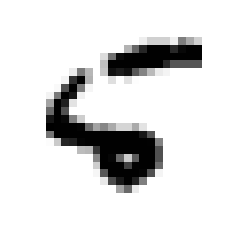

y[9]=[0.05864854 0.10520022 0.14615488 0.12251318 0.0947169  0.0776469
 0.0652913  0.12249115 0.09243967 0.11489726]


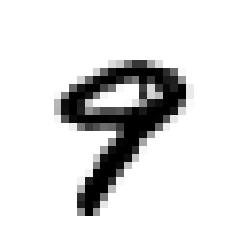

In [28]:
for i in range(10):
    show_image(i,X_test,y_test_predictions_3)

```
## y[0]=[0.16281545 0.1173299  0.05693516 0.10273345 0.08746524 0.10595699 0.12046865 0.05378396 0.14406249 0.04844872]
## y[1]=[0.05216441 0.04349981 0.03605977 0.15977919 0.10273835 0.02611828 0.44649547 0.0377673  0.03104113 0.06433626]
## y[2]=[0.09788322 0.11862788 0.08240269 0.08698214 0.13082416 0.05660462 0.11849659 0.13929252 0.08189297 0.08699314]
## y[3]=[0.09815832 0.11570205 0.06317189 0.13648759 0.11287769 0.13927104 0.08901155 0.0907776  0.06425376 0.09028849]
## y[4]=[0.12606679 0.15446827 0.03564796 0.13464415 0.13424502 0.07947717 0.05067337 0.05715863 0.12938939 0.09822927]
## y[5]=[0.08710498 0.09832148 0.17565586 0.08646388 0.10341191 0.06050617 0.12173753 0.10435271 0.06615194 0.09629346]
## y[6]=[0.05944629 0.03025002 0.07693496 0.03388218 0.16456021 0.04359526 0.05945991 0.20069426 0.24324118 0.08793575]
## y[7]=[0.8572022  0.0127816  0.00219625 0.01541828 0.0024446  0.00464313 0.04673591 0.00099768 0.04584493 0.01173541]
## y[8]=[0.01286772 0.27764538 0.11284747 0.16975999 0.00411726 0.11058369 0.02988146 0.17832306 0.09544756 0.00852644]
## y[9]=[0.01153136 0.03340643 0.15171498 0.04497335 0.04670532 0.23156948 0.07323335 0.21422522 0.11856953 0.07407112]
```
![y0](y0.png)
![y1](y1.png)
![y2](y2.png)
![y3](y3.png)
![y4](y4.png)
![y5](y5.png)
![y6](y6.png)
![y7](y7.png)
![y8](y8.png)
![y9](y9.png)

## Modèle avec un réseau convolutif

Un réseau convolutif, voir l'[article](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53).

In [29]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [30]:
# On reformate les donnees
X_train_cnn = np.expand_dims(X_train_0, axis=3)
X_test_cnn  = np.expand_dims(X_test_0, axis=3)
input_shape = (28,28,1)

In [31]:
# Creation du modele
# -- Parametres du modele
model_4_functions = {'loss':'categorical_crossentropy', 'optimizer':'adam','metrics':['categorical_accuracy']}
model_4_cnn_parameters = {'num_filters':8,'filter_size':3,'pool_size':2}
# -- Architecture du modele
model_4 = Sequential()
model_4.add(Conv2D(model_4_cnn_parameters['num_filters'], model_4_cnn_parameters['filter_size'], input_shape=input_shape, activation='relu'))
model_4.add(MaxPooling2D(pool_size=model_4_cnn_parameters['pool_size']))
model_4.add(Flatten())
model_4.add(Dense(num_classes, kernel_initializer='uniform', activation='softmax'))
# -- Compilation
model_4.compile(loss=model_4_functions['loss'],optimizer=model_4_functions['optimizer'],metrics=model_4_functions['metrics'])

In [32]:
# Entrainement du modele
# -- Parametres d'apprentissage
learning_parameters_4 = {'batch_size': 128, 'epochs': 5}
# -- Apprentissage: history capture ce qui s'est passe durant l'apprentissage
model_4_history = model_4.fit(X_train_cnn, y_train_cat, batch_size=learning_parameters_4['batch_size'], epochs=learning_parameters_4['epochs'], verbose=0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


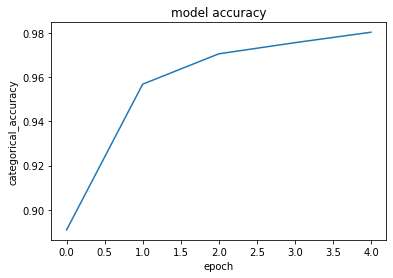

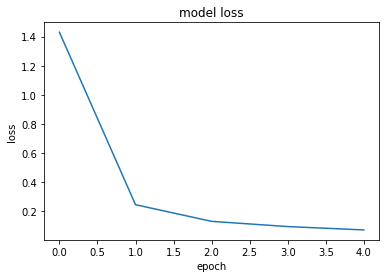

In [33]:
# -- Resume
model_4.summary()
plot_train_history_accuracy(model_4_history)
plot_train_history_loss(model_4_history)

```
## Model: "sequential_3"
## _________________________________________________________________
## Layer (type)                Output Shape              Param #   
## =================================================================
## conv2d (Conv2D)             (None, 26, 26, 8)         80        
##                                                                 
## max_pooling2d (MaxPooling2D)  (None, 13, 13, 8)        0         
##                                                                 
## flatten (Flatten)           (None, 1352)              0         
##                                                                 
## dense_6 (Dense)             (None, 10)                13530     
##                                                                 
## =================================================================
## Total params: 13,610
## Trainable params: 13,610
## Non-trainable params: 0
## _________________________________________________________________
```
![conv_accuracy](conv_accuracy.png)
![conv_loss](conv_loss.png)

In [34]:
# Prediction sur le jeu de test
final_loss_4, final_acc_4 = model_4.evaluate(X_test_cnn, y_test_cat, verbose=0)
print("Perte finale sur les donnees de test: {0:.6f}, exactitude finale sur les donnees de test: {1:.6f}".format(final_loss_4, final_acc_4))
y_test_predictions_4 = model_4.predict(X_test_cnn)

Perte finale sur les donnees de test: 0.129864, exactitude finale sur les donnees de test: 0.970400


```
## Perte finale sur les donnees de test: 0.142493, exactitude finale sur les donnees de test: 0.966300
```

y[0]=[1.26483584e-17 1.02425723e-15 1.05532865e-11 2.49590926e-09
 6.20645897e-18 2.65670705e-18 3.65786666e-20 1.00000000e+00
 4.31334981e-13 2.89243456e-13]


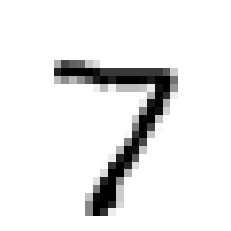

y[1]=[5.3447115e-14 1.5669930e-09 9.9999964e-01 2.2970677e-07 1.9460514e-21
 1.3052115e-14 9.2536574e-08 3.8682539e-20 2.4885946e-11 4.4446184e-17]


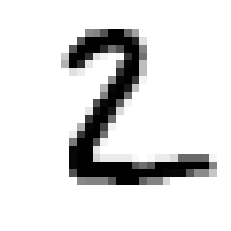

y[2]=[3.6906650e-07 9.9766648e-01 7.7864006e-06 4.5931088e-08 2.2728187e-03
 1.1131257e-08 1.1075776e-07 2.9188301e-05 2.3160726e-05 4.4464390e-08]


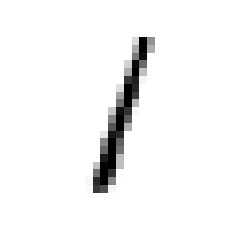

y[3]=[9.9999440e-01 3.6451557e-13 8.4891877e-07 1.6222361e-10 1.9076680e-08
 1.0565735e-11 4.7116328e-06 2.3390931e-09 2.1402380e-09 2.0304116e-08]


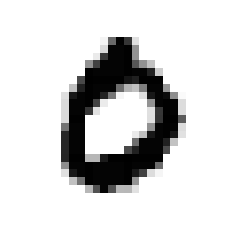

y[4]=[3.2431308e-10 1.3461831e-12 1.6366313e-14 9.7891860e-12 1.0000000e+00
 4.3802977e-13 5.5121910e-12 9.2278428e-11 1.3585236e-11 2.3802418e-09]


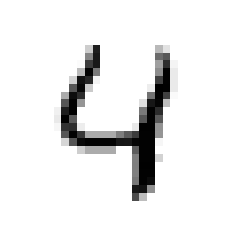

y[5]=[6.2957980e-07 9.9283534e-01 5.0533790e-06 3.5032421e-08 1.3435155e-03
 6.7943984e-10 1.2571695e-08 5.6207301e-03 1.9364961e-04 8.9960741e-07]


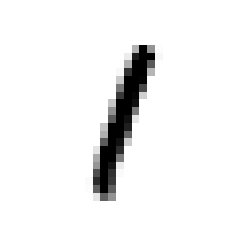

y[6]=[8.1087805e-21 1.1161989e-09 1.0016562e-12 3.1977987e-10 9.9999785e-01
 8.5267665e-13 1.4553727e-13 5.4835496e-09 2.0863040e-06 4.6543363e-08]


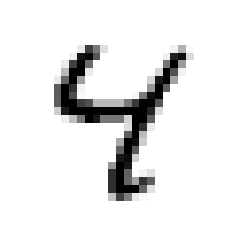

y[7]=[1.6576001e-14 2.5135780e-10 3.2868542e-08 3.0214653e-09 5.9901872e-03
 2.6519007e-07 4.7941750e-14 1.9968578e-12 4.1730018e-06 9.9400538e-01]


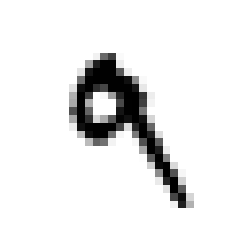

y[8]=[2.9665720e-15 1.5015892e-18 6.2829406e-15 6.9654933e-15 2.4257270e-13
 9.9012417e-01 9.8703746e-03 4.9429236e-18 5.4848406e-06 1.5083698e-10]


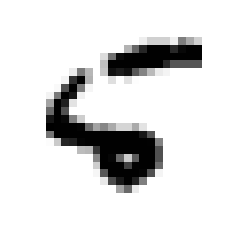

y[9]=[7.8548010e-12 1.7683669e-17 1.3882785e-15 7.0149705e-11 1.3564791e-07
 5.1277748e-13 1.5551533e-16 7.5407508e-05 7.9709991e-08 9.9992430e-01]


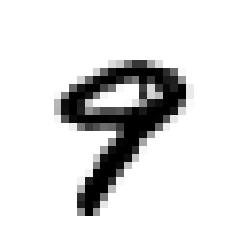

In [35]:
for i in range(10):
    show_image(i,X_test,y_test_predictions_4)

```
## y[0]=[4.5193189e-16 5.7831611e-17 5.4262386e-11 7.2845840e-10 2.1925894e-16 3.2268354e-21 1.9808476e-23 1.0000000e+00 9.5324664e-15 1.0649881e-11]
## y[1]=[1.1020174e-09 1.8969848e-09 1.0000000e+00 1.9481675e-15 6.3035375e-21 3.1732914e-16 3.9040313e-10 1.7707114e-21 2.9784920e-19 3.5481429e-26]
## y[2]=[1.1822509e-09 9.9992132e-01 1.1849968e-06 5.1752681e-07 6.9176436e-05 3.1612270e-08 2.2765903e-08 2.3011448e-06 5.0022190e-06 5.4026287e-07]
## y[3]=[9.9999988e-01 2.1754318e-19 1.1579071e-07 3.1549704e-11 9.8314293e-13 1.1542542e-13 1.2846354e-11 5.1325255e-10 1.0827605e-14 1.6853505e-13]
## y[4]=[8.7714391e-11 2.6834902e-17 5.9114179e-11 1.2368757e-08 9.9999392e-01 2.7537269e-17 1.2376503e-11 9.7850295e-10 3.3718294e-08 6.0599182e-06]
## y[5]=[2.7008413e-08 9.9856949e-01 1.3751866e-05 5.1421756e-07 6.5093423e-04 5.3477448e-11 9.9189697e-07 5.2662304e-04 2.2443356e-04 1.3322286e-05]
## y[6]=[1.0761636e-14 1.1072611e-09 1.8516411e-13 7.0033289e-12 9.9999964e-01 3.2864957e-13 6.4319670e-18 3.7561985e-12 3.5941321e-07 1.5149375e-08]
## y[7]=[3.0571043e-13 6.8577624e-09 8.2965521e-08 8.0896185e-05 1.3196903e-01 2.4283070e-05 1.8437448e-11 1.6632761e-06 3.4585081e-03 8.6446548e-01]
## y[8]=[4.5842107e-08 1.7659237e-17 4.1552287e-10 2.6097288e-08 7.6798869e-09 1.4162673e-01 8.5830569e-01 2.4848817e-20 6.7560846e-05 1.2194048e-08]
## y[9]=[1.3694067e-11 2.7254711e-17 2.7708597e-12 9.6671774e-06 1.6688490e-04 1.8421648e-08 4.7383705e-15 1.5283602e-05 1.1261792e-07 9.9980801e-01]
````
![y0](y0.png)
![y1](y1.png)
![y2](y2.png)
![y3](y3.png)
![y4](y4.png)
![y5](y5.png)
![y6](y6.png)
![y7](y7.png)
![y8](y8.png)
![y9](y9.png)